# Proyek Analisis Data: Bike Sharing
- **Nama:** Muhammad Fadhlan Nafis
- **Email:** muhammadfadhlannafis@gmail.com
- **ID Dicoding:** mfadhlan_nafis

## Menentukan Pertanyaan Bisnis

Dengan mengikuti prosedur membuat pertanyaan analisis yang efektif, didapatkan beberapa pertanyaan sebagai berikut:

- Bagaimana performa rental sepeda berdasarkan hari pada tiap musimnya
 (season)?
- Berapa lama waktu yang paling banyak (modus) disewa berdasarkan jam (file hour)?
- Bagaimana cara meningkatkan jumlah rental sepeda pada musim (season) yang performa rentalnya belum baik dengan melihat jumlah pesanan tiap harinya?
- Bagaimana pengaruh temperatur terhadap penyewaan sepeda?
- Bagaimana perkembangan rental sepeda dari tahun 2011-2012?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
#Membaca file day.csv
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
#Membaca file hour.csv
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

- Melihat info dari tiap file untuk menganalisis jumlah data null dan tipe data

In [5]:
#Info dataset day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
#Info dataset hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Pada kedua dataset, tidak ada masalah pada bagian data yang null karena semua nilai data telah terdaftar. Tetapi ada kesalahan pada tipe data dteday yang berupa objek, seharusnya bertipe data datetime.

- Memeriksa data yang hilang

In [7]:
#Periksa data hilang dataset day_df
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
#Periksa data hilang dataset hour_df
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Pada kedua data tidak ada data yang hilang

- Memeriksa data yang duplikat

In [9]:
print("Jumlah duplikasi day_df: ", day_df.duplicated().sum())
print("Jumlah duplikasi hour_df: ", hour_df.duplicated().sum())

Jumlah duplikasi day_df:  0
Jumlah duplikasi hour_df:  0


- Memperoleh informasi terkait statistika deskriptif

In [10]:
#Statistika Deskriptif dataset day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
#Statistika Deskriptif dataset hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Semua nilai statistika deskriptif pada kedua dataset sesuai dengan tipenya karena berupa angka dan tidak ada data yang tidak biasa (tidak valid). Jadi, proses gathering data sudah selesai.

### Cleaning Data

- Mengubah tipe data dari dteday menjadi datetime

In [12]:
#Proses pengubahan tipe
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Tipe data dari dteday sudah menjadi datetime sehingga proses cleaning data sudah selesai

## Exploratory Data Analysis (EDA)

### Explore ...

In [15]:
#Performa jumlah penyewaan sepeda berdasarkan musim (season)
day_df.groupby(by='season').agg({
    'cnt': 'sum',
    'casual': 'sum',
    'registered': 'sum'
})

,cnt,casual,registered
season,,,
1,471348,60622,410726
2,918589,203522,715067
3,1061129,226091,835038
4,841613,129782,711831


In [16]:
#Modus lama jam penyewaan sepeda
hour_df.groupby(by='hr').agg({
    'cnt': 'max',
    'casual': 'max',
    'registered': 'max'
})

,cnt,casual,registered
hr,,,
0,283,68,234
1,168,49,139
2,132,44,104
3,79,26,61
4,28,13,22
5,66,16,64
6,213,19,203
7,596,40,572
8,839,69,808


In [17]:
#Jumlah penyewaan sepeda perhari berdasarkan musim 1 karena performanya penyewaan sepedanya kurang baik
#Filter data menjadi dataset season 1
data_filter = day_df[day_df["season"]==1]
data_filter.groupby(by='weekday').agg({
    'cnt': 'sum',
    'casual': 'sum',
    'registered': 'sum'
})

,cnt,casual,registered
weekday,,,
0,60195,14450,45745
1,63771,6572,57199
2,69813,5868,63945
3,65277,5020,60257
4,72355,5554,66801
5,74264,7353,66911
6,65673,15805,49868


In [18]:
#Pengaruh temperatur terhadap jumlah penyewaan sepeda per hari
df_temp_cntday = {
    "total_rental_perday": day_df["cnt"],
    "temperature": day_df["temp"]
}

data = pd.DataFrame(df_temp_cntday)
print(data.corr())

                     total_rental_perday  temperature
total_rental_perday             1.000000     0.627494
temperature                     0.627494     1.000000


In [19]:
#Tren penyewaan sepeda dari 2011-2012 berdasarkan hari
day_df.groupby(by='yr').agg({
    'cnt': 'sum',
    'casual': 'sum',
    'registered': 'sum'
})

,cnt,casual,registered
yr,,,
0,1243103,247252,995851
1,2049576,372765,1676811


## Visualization & Explanatory Analysis

### Pertanyaan 1:

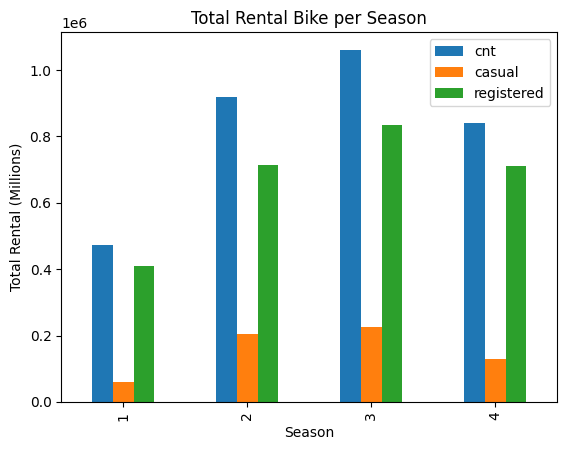

In [20]:
#Performa jumlah penyewaan sepeda per hari berdasarkan musim (season)
data_tren_season = day_df.groupby(by='season').agg({
    'cnt': 'sum',
    'casual': 'sum',
    'registered': 'sum'
})
data_tren_season.plot(kind='bar')
plt.xlabel("Season")
plt.ylabel("Total Rental (Millions)")
plt.title("Total Rental Bike per Season")
plt.show()

Dapat dilihat bahwa season 3 (fall) menjadi musim paling bagus performanya dalam total penyewaan sepeda per hari, sedangkan musim 1 (springer) menjadi musim paling buruk performanya dalam total penyewaan sepeda per hari

### Pertanyaan 2:

Total Rental Bike per Hour
    cnt  casual  registered
hr                         
0   283      68         234
1   168      49         139
2   132      44         104
3    79      26          61
4    28      13          22
5    66      16          64
6   213      19         203
7   596      40         572
8   839      69         808
9   426     142         399
10  539     209         351
11  663     268         446
12  776     362         526
13  760     355         491
14  750     361         502
15  750     357         456
16  783     367         481
17  976     347         885
18  977     266         886
19  743     230         662
20  567     237         461
21  584     222         362
22  502     175         327
23  256      71         220


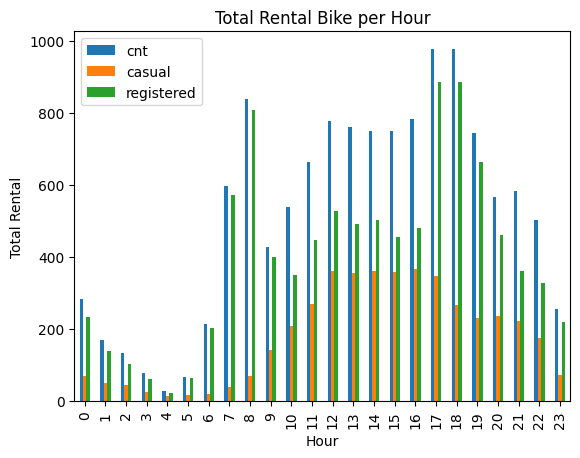

In [21]:
#Melihat modus berapa jam penyewaan sepeda
data_mode_hour = hour_df.groupby(by='hr').agg({
    'cnt': 'max',
    'casual': 'max',
    'registered': 'max'
})

print("Total Rental Bike per Hour")
print(data_mode_hour)
data_mode_hour.plot(kind='bar')
plt.xlabel("Hour")
plt.ylabel("Total Rental")
plt.title("Total Rental Bike per Hour")
plt.show()

Berdasarkan total jam penyewaan sepeda secara faktual dan grafik maka 18 dan 17 jam merupakan modus dari penyewaan sepeda. Artinya konsumen senang apabila menyewa sepedanya selama 3/4 hari.

### Pertanyaan 3:

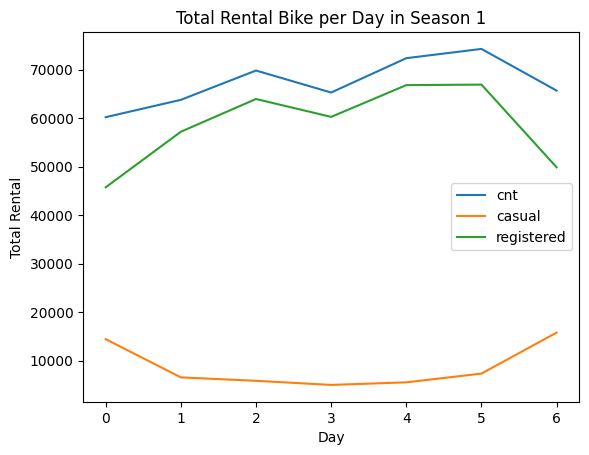

In [22]:
#Jumlah penyewaan sepeda perhari berdasarkan musim 1 karena performanya penyewaan sepedanya kurang baik
data_filtered = day_df[day_df["season"]==1]
data_day_season1 = data_filtered.groupby(by='weekday').agg({
    'cnt': 'sum',
    'casual': 'sum',
    'registered': 'sum'
})
data_day_season1.plot()
plt.xlabel("Day")
plt.ylabel("Total Rental")
plt.title("Total Rental Bike per Day in Season 1")
plt.show()

Analisis dapat menjadi 2 melihat dari segi pelanggan registered (langganan) dan pelanggan casual (belum berlangganan).
Pelanggan registered kurang berminat untuk melakukan penyewaan sepeda pada hari senin(0) dan minggu(6), sementara itu pelanggan casual kurang berminat untuk melakukan penyewaan sepeda pada hari selasa(1), rabu(2), kamis(3), jumat(4), dan sabtu(5). Hal tersebut menyimpulkan bahwa daya tarik penyewaan sepeda antara registered dan casual saling berlawanan.
- Registered
1. Adanya paket diskon atau paket bundel penyewaan selama dua hari yaitu hari minggu-senin, agar penyewaan di hari tersebut dapat meningkat
2. Apabila pelanggan registered mayoritas sebagai pekerja, maka lokasi penyewaan sepeda harus strategis berada di wilayah perkantoran
3. Adanya grup keanggotaan, sehingga pelanggan registered bisa mendapatkan informasi lengkap atau baru mengenai penyewaan sepeda

- Casual
1. Adanya paket diskon atau paket bundel penyewaan selama seminggu yaitu hari senin-minggu, agar penyewaan di hari tersebut dapat meningkat
2. Apabila pelanggan registered casual sebagai turis, maka lokasi penyewaan sepeda harus strategis berada di wilayah pariwisata
3. Adanya grup keanggotaan, sehingga pelanggan casual bisa mendapatkan informasi lengkap atau baru mengenai penyewaan sepeda

### Pertanyaan 4:

Correlation Total Rental Bike per Day and Temperature
                      total_rental_per_day  temperature
total_rental_per_day              1.000000     0.627494
temperature                       0.627494     1.000000


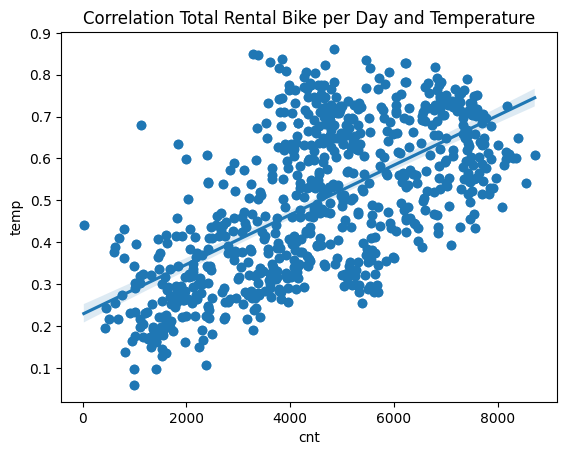

In [23]:
#Pengaruh temperatur terhadap jumlah penyewaan sepeda per hari
df_temp_cntday = {
    "total_rental_per_day": day_df["cnt"],
    "temperature": day_df["temp"]
}

data = pd.DataFrame(df_temp_cntday)
print('Correlation Total Rental Bike per Day and Temperature')
print(data.corr())
plt.scatter(day_df["cnt"],day_df["temp"])
plt.xlabel("Total Rental Bike per Day")
plt.ylabel("Temperature (°C / 41)")
plt.title("Correlation Total Rental Bike per Day and Temperature")
sns.regplot(x=day_df["cnt"], y=day_df["temp"])
plt.show()

Nilai korelasi antara total penyewaan sepeda per hari dan temperatur sebesar 0.627494 yang berarti memiliki hubungan linear dan hubungannya cukup kuat. Apabila suhu naik dengan maks 41 °C, maka pelanggan pun akan naik dalam hal penyewaan sepeda

### Pertanyaan 5

Total Rental Bike per Day (2011-2012)
        cnt  casual  registered
yr                             
0   1243103  247252      995851
1   2049576  372765     1676811


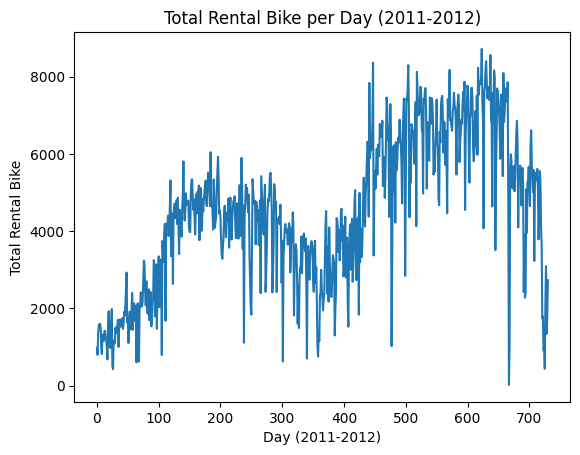

In [24]:
#Tren penyewaan sepeda dari 2011-2012 berdasarkan hari
data_totalbike_per_day = day_df.groupby(by='yr').agg({
    'cnt': 'sum',
    'casual': 'sum',
    'registered': 'sum'
})

print('Total Rental Bike per Day (2011-2012)')
print(data_totalbike_per_day)
plt.plot(day_df["cnt"])
plt.xlabel("Day (2011-2012)")
plt.ylabel("Total Rental Bike")
plt.title("Total Rental Bike per Day (2011-2012)")
plt.show()

Tren penyewaan sepeda mengalami peningkatan dari 2011-2012 karena total penyewaan sepeda per hari pada 2011 berjumlah 1243103 sedangkan 2012 berjumlah 2049576. Tetapi tren penyewaan sepeda pada tahun 2012 mengalami penurunan saat di akhir tahun sehingga perlu adanya strategi untuk mengembalikan minat penyewaan sepeda di awal tahun 2013 caranya dengan adanya paket penyewaan dan diskon menarik untuk pelanggan baru di awal tahun 2013.

## Conclusion

- Musim 3 memiliki performa bagus dalam total penyewaan sepeda per hari, sedangkan musim 1 memiliki performa buruk dalam total penyewaan sepeda per hari sehingga perlu dilakukan strategi yang tepat dalam meningkatkan minat pelanggan
- 18 dan 17 jam menjadi modus lama sewa penyewaan sepeda
- Strategi untuk meningkatkan minat pelanggan pada musim 1 dapat dibagi menjadi 2 strategi berbeda antara pelanggan registered dan pelanggan casual
- Hubungan temperatur dan total penyewaan sepeda per hari bersifat linear dan cukup kuat
- Tren total penyewaan sepeda 2012 lebih baik daripada 2011, tetapi pada akhir tahun 2012 total penyewaan sepeda mengalami penurunan, sehingga harus ada strategi khusus di awal tahun 2013